In [5]:
from spectral.io import envi
import numpy as np
from Daten_einlesen.find_path_nextcloud import find_path_nextcloud
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from spectral import *
from Daten_einlesen.find_path_nextcloud import find_path_nextcloud

In [6]:
from xml.dom import minidom
# Import Packages

# Pfad Nextcloud bestimmen
path_nextcloud = find_path_nextcloud()

# Festlegung, welches Grid zusammengelegt werden soll
windowsize_r = 200
windowsize_c = 200

# Bestimmung grid Ordnername
annotation_folder = path_nextcloud + "Daten_Gyrocopter/Oldenburg/Teilbilder/grid_" + str(windowsize_r) + "_" + str(
    windowsize_c)+'/Export_labeled/'

# parse an xml file by name

mydoc = minidom.parse(annotation_folder+'Teilbild_Oldenburg_00000000_00000000_0_0__jpg.rf.36224be5c78237378b09eb42a52e83b1.xml')

items = mydoc.getElementsByTagName('item')

# one specific item attribute
print('Item #2 attribute:')
print(items[1].attributes['name'].value)

FileNotFoundError: [Errno 2] No such file or directory: 'path_nextcloud_timo.txt'

OSError: [Errno 22] Invalid argument: 'C:\\Users\\Timo\\Nextcloud\\Freigaben\\Projekt_Data_Science_1_SS22\\Daten_Gyrocopter\\Oldenburg\\Teilbilder\\grid_200_200\\labeled\\Teilbild_Oldenburg_00000000_00000000_0_0_.dat'

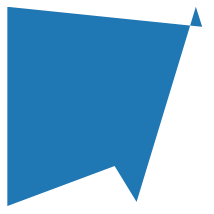

In [23]:
#proof of concept
fig, ax = plt.subplots()
plt.xlim(0, 200)
plt.ylim(0, 200)

#fig.canvas.figure.set_figheight=200
#fig.canvas.figure.set_figwidth=200
#matplotlib.pyplot.axis([0, 200, 0, 200])

patches = []

a=[[188.63497595405806,200],[129.37638065961175,4.901960784313772],[107.42160091131402,40.784313725490236],[0.14729,0.76160],[0.15395,200],[195,180]]
#a=[[0,0],[0,150],[150,150],[150,0]]

for i in range(1):
    polygon = Polygon(a, True)
    patches.append(polygon)

p = PatchCollection(patches)

#colors = [1]
#p.set_array(np.array(colors))

ax.add_collection(p)

fig.set_size_inches(20/7.2, 20/7.2)
fig.canvas.draw()

import io
plt.axis('off')
fig = ax.figure
fig.tight_layout(pad=0)
with io.BytesIO() as buff:
    fig.savefig(buff, format='raw')
    buff.seek(0)
    data = np.frombuffer(buff.getvalue(), dtype=np.uint8)
w, h = fig.canvas.get_width_height()
data = data.reshape((int(h), int(w), -1)).transpose((2, 0, 1))


path_dat= r'C:\Users\Timo\Nextcloud\Freigaben\Projekt_Data_Science_1_SS22\Daten_Gyrocopter\Oldenburg\Teilbilder\grid_200_200\Teilbild_Oldenburg_00000000_00000000_0_0_.dat'
path_hdr=r'C:\Users\Timo\Nextcloud\Freigaben\Projekt_Data_Science_1_SS22\Daten_Gyrocopter\Oldenburg\Teilbilder\grid_200_200\Teilbild_Oldenburg_00000000_00000000_0_0_.hdr'
img = envi.open(file=path_hdr, image=path_dat)

new_bands = ['Haus','Wiese','See','Straße']
arr_metadata = img.metadata

for new_band in new_bands:
    arr_metadata['wavelength'].append(new_band)
    arr_metadata['band names'].append(new_band)
    arr_metadata['fwhm'].append(new_band)

arr_metadata['bands']=int(arr_metadata['bands'])+len(new_bands)
path_dat_labbeled=r'C:\Users\Timo\Nextcloud\Freigaben\Projekt_Data_Science_1_SS22\Daten_Gyrocopter\Oldenburg\Teilbilder\grid_200_200\labeled\Teilbild_Oldenburg_00000000_00000000_0_0_.dat'
path_hdr_labbeled=r'C:\Users\Timo\Nextcloud\Freigaben\Projekt_Data_Science_1_SS22\Daten_Gyrocopter\Oldenburg\Teilbilder\grid_200_200\labeled\Teilbild_Oldenburg_00000000_00000000_0_0_.hdr'
img_labbeled = envi.create_image(hdr_file=path_hdr_labbeled, metadata=arr_metadata, dtype="float32", ext='.dat', interleave='bsq',
                         force=True)

# Zugriff auf Bild Matrix erstellen
N=200
writer = img_labbeled.open_memmap(writable=True)
writer[:,:,0:109]=img.open_memmap(writable=False)

writer[:,:,110]=data[0]


# grab the pixel buffer and dump it into a numpy array

#X = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
#X = X.reshape(fig.canvas.get_width_height()[::-1] + (3,))


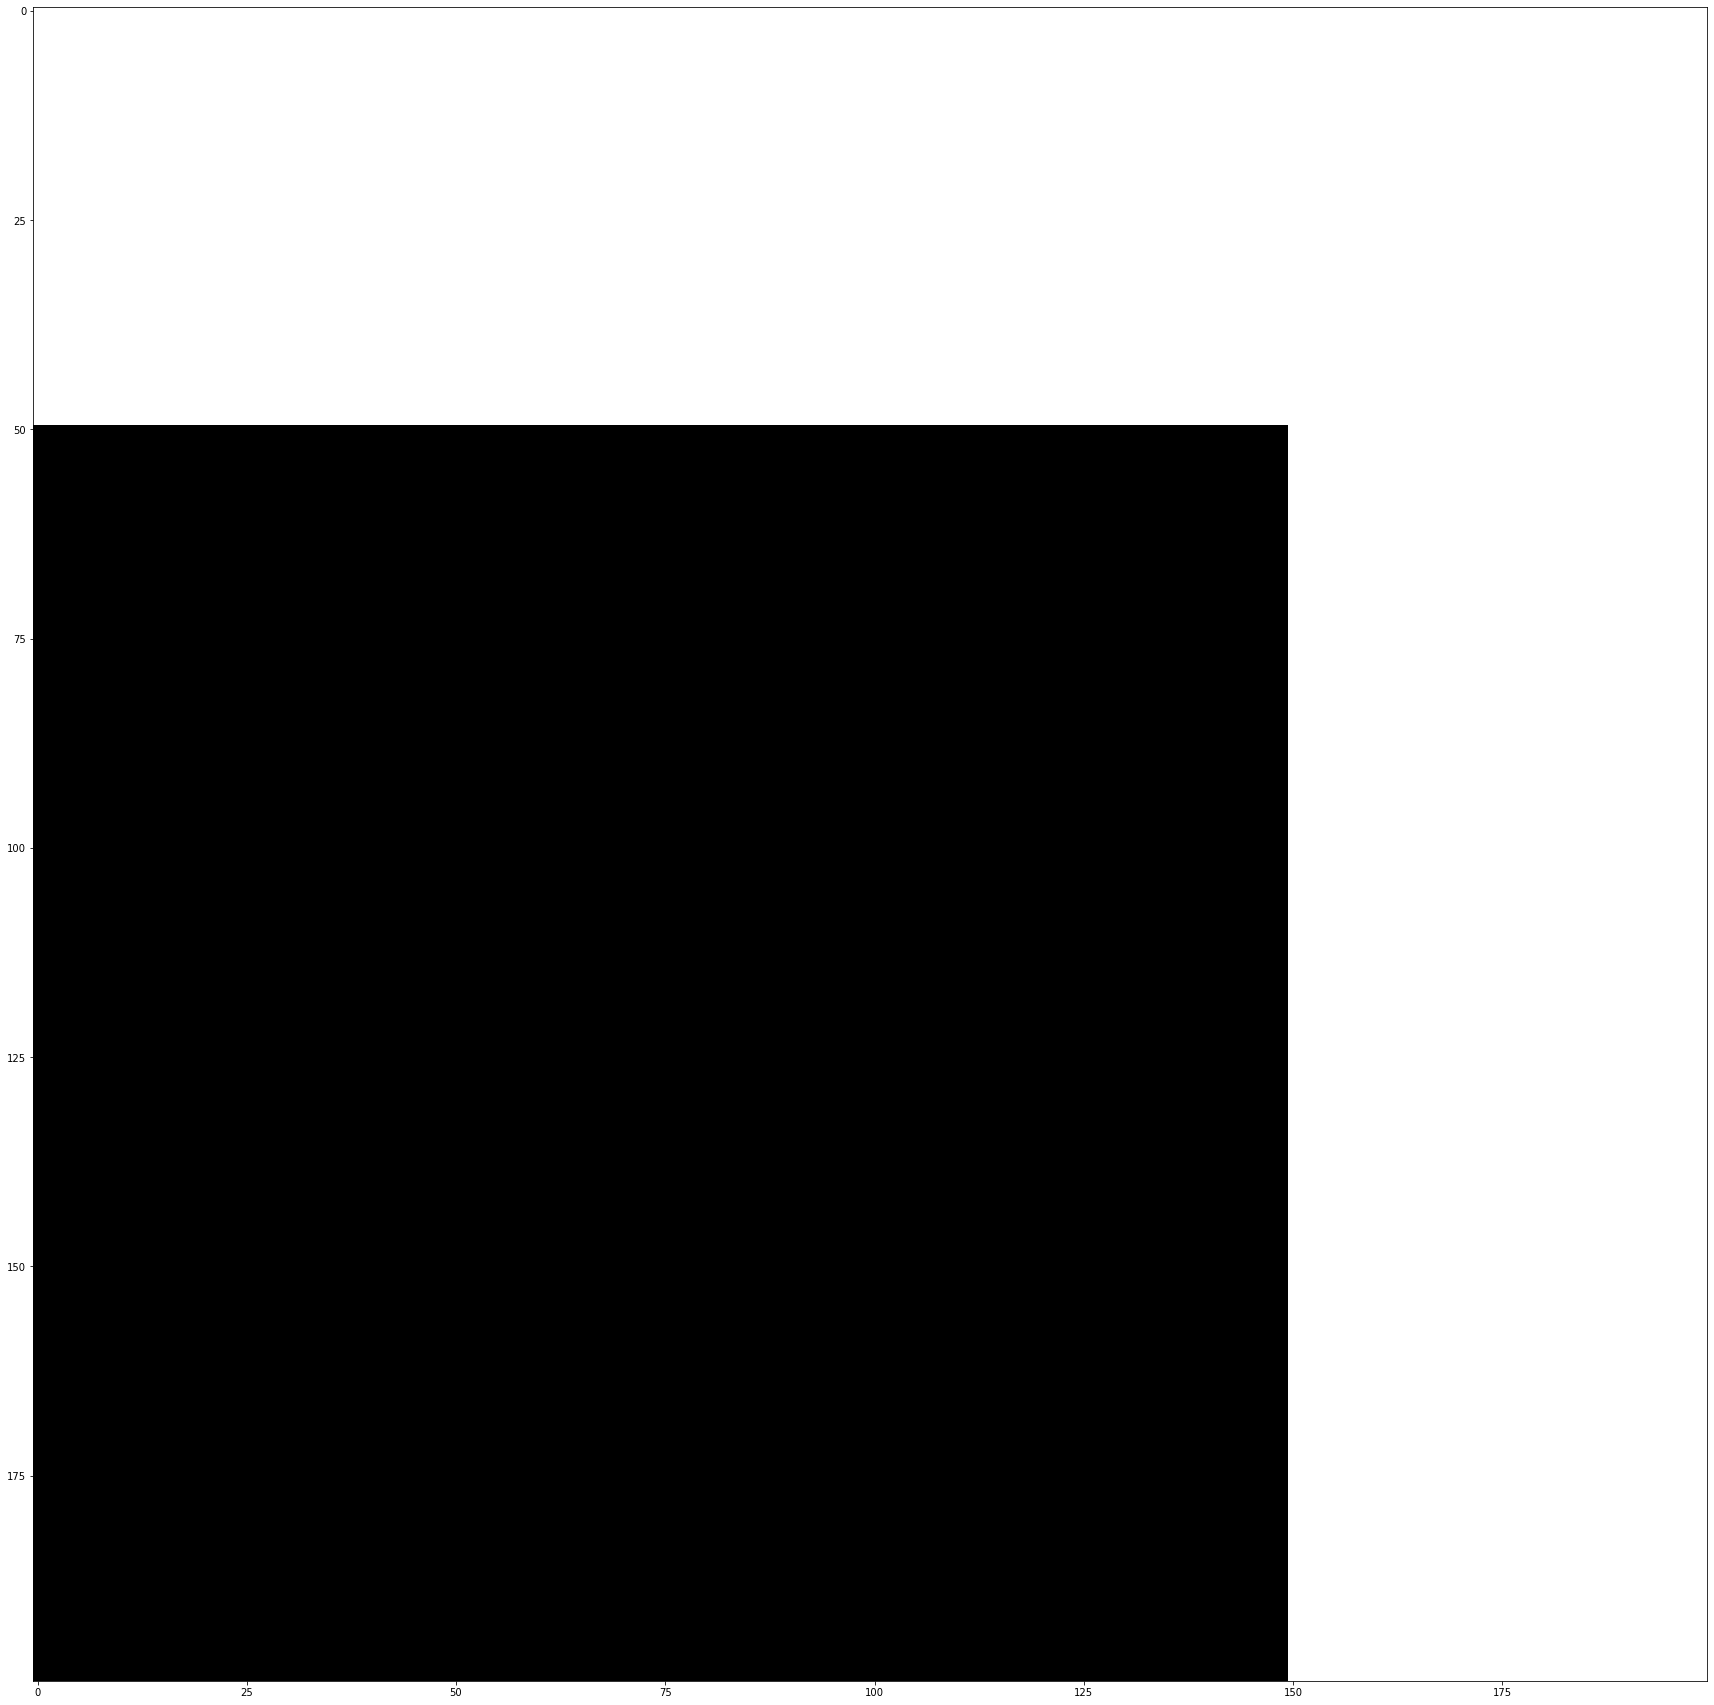

In [4]:
from spectral import imshow
from spectral.io import envi
path_dat_labbeled=r'C:\Users\Timo\Nextcloud\Freigaben\Projekt_Data_Science_1_SS22\Daten_Gyrocopter\Oldenburg\Teilbilder\grid_200_200\labeled\Teilbild_Oldenburg_00000000_00000000_0_0_.dat'
path_hdr_labbeled=r'C:\Users\Timo\Nextcloud\Freigaben\Projekt_Data_Science_1_SS22\Daten_Gyrocopter\Oldenburg\Teilbilder\grid_200_200\labeled\Teilbild_Oldenburg_00000000_00000000_0_0_.hdr'

img_his = envi.open(file=path_hdr_labbeled, image=path_dat_labbeled)
view = imshow(img_his[:,:,110], figsize=(30,50))


C:\Users\Timo\AppData\Local\Temp\ipykernel_8288\4059419297.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  X = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')


ValueError: cannot reshape array of size 114390 into shape (200,200,3)

In [63]:
data[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 31,  31,  31, ..., 255, 255, 255],
       [ 31,  31,  31, ..., 255, 255, 255],
       [ 31,  31,  31, ..., 255, 255, 255]], dtype=uint8)

In [27]:
from os import read
from Daten_einlesen.find_path_nextcloud import find_path_nextcloud
from xml.dom import minidom

# Import Packages

# Pfad Nextcloud bestimmen
path_nextcloud = find_path_nextcloud()
import xmltodict as xmltodict
from spectral.io import envi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


# Festlegung, welches Grid zusammengelegt werden soll
windowsize_r = 200
windowsize_c = 200
annotation_folder = path_nextcloud + "Daten_Gyrocopter/Oldenburg/Teilbilder/grid_" + str(windowsize_r) + "_" + str(
    windowsize_c)+'/Export_labeled/'
# Bestimmung grid Ordnername
annotation_folder = path_nextcloud + "Daten_Gyrocopter/Oldenburg/Teilbilder/grid_" + str(windowsize_r) + "_" + str(
    windowsize_c) + '/Export_labeled/'

# parse an xml file by name
file = annotation_folder + 'Teilbild_Oldenburg_00000000_00000000_0_0__jpg.rf.36224be5c78237378b09eb42a52e83b1.xml'

with open(file) as fd:
    doc = xmltodict.parse(fd.read())
fig, ax = plt.subplots()
for object in doc['annotation']['object']:


    plt.xlim(0, 200)
    plt.ylim(0, 200)
    name = object['name']
    polygon = object['polygon']
    patches = []

    coords = []
    for i in range(1, int(len(polygon) / 2)):
        point = [polygon['x' + str(i)], polygon['y' + str(i)]]
        coords.append(point)
    patches.append(Polygon(coords, True))
    p = PatchCollection(patches)

    ax.add_collection(p)
    fig.set_size_inches(20 / 7.2, 20 / 7.2)
    fig.canvas.draw()

    plt.axis('off')
    fig = ax.figure
    fig.tight_layout(pad=0)
fig.canvas.draw()



FileNotFoundError: [Errno 2] No such file or directory: 'path_nextcloud_timo.txt'